### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

In [134]:
import pandas as pd
#1-

df = pd.read_csv (r"C:\Users\delma\OneDrive\Bureau\my_project_pytho_II\data (3).csv")
df.head()


,date,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [135]:
#2-

df["date"] = pd.to_datetime(df["date"], format="%Y-%m")
df["mese_numeric"] = (df["date"].dt.year - 1949) * 12 + df["date"].dt.month
df


,date,passengers,mese_numeric
0,1949-01-01,112.0,1
1,1949-02-01,118.0,2
2,1949-03-01,132.0,3
3,1949-04-01,129.0,4
4,1949-05-01,121.0,5
...,...,...,...
127,1960-08-01,606.0,140
128,1960-09-01,508.0,141
129,1960-10-01,461.0,142
130,1960-11-01,NaN,143


Pendenza       : 31.487
Intercept    : -61259.213
R²          : 0.844
P-value     : 2.2813736130232264e-54
Erreur std. : 1.185
Con il nostro R^2 = 0.844 e P-value = 2.2813736130232264e-54, ppossiamo concludere che il modello spiega bene i nostri dati
Possiamo concludere che esiste una forte relazione lineare positiva tra 'passengers' e 'date': ad ogni aumento di 'date', 'passengers' tende a aumentare fortemente.


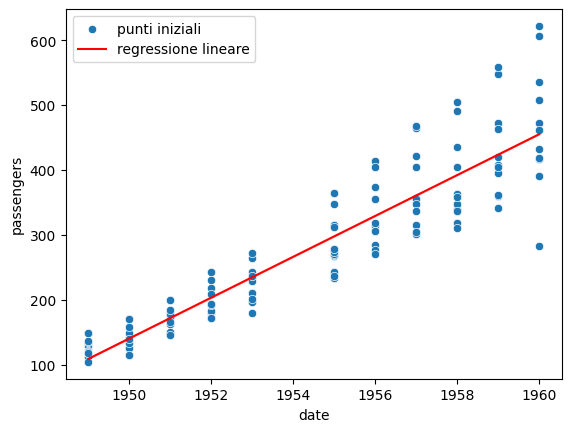

In [136]:
#3-
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import linregress

df["passengers"] = df["passengers"].fillna(df["passengers"].mean())
df.isna().sum()
x = df["date"].dt.year
x.value_counts()
y = df["passengers"]
sns.scatterplot(x=x, y=y, label = 'punti iniziali')
coef = np.polyfit(x=x, y=y, deg=1)
coef
y_pred = np.polyval(coef, x)
# y_pred
sns.lineplot(x=x, y=y_pred, color='red', label = 'regressione lineare')

mod = linregress(x=x, y=y)
print(f"Pendenza       : {mod.slope:.3f}")
print(f"Intercept    : {mod.intercept:.3f}")
print(f"R²          : {mod.rvalue**2 :.3f}")
print(f"P-value     : {mod.pvalue:}")
print(f"Erreur std. : {mod.stderr:.3f}")
print("Con il nostro R^2 = {} e P-value = {}, ppossiamo concludere che il modello spiega bene i nostri dati".format(round(mod.rvalue**2,3),mod.pvalue))
print("Possiamo concludere che esiste una forte relazione lineare positiva tra 'passengers' e 'date': ad ogni aumento di 'date', 'passengers' tende a aumentare fortemente.")

In [157]:
#4-
RMSE = np.sqrt((np.sum(y - y_pred)**2) / len(y) )
print("il RMSE VALE:",RMSE)

il RMSE VALE: 1.3226377793283946e-10


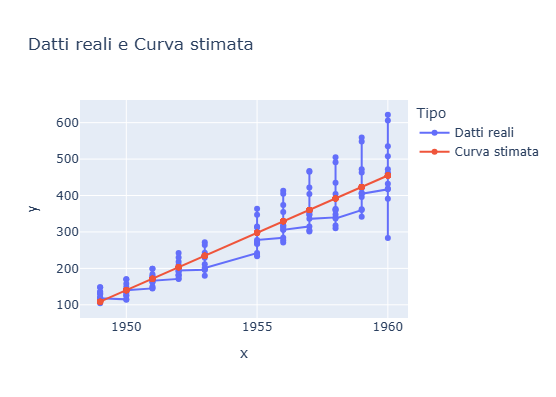

In [ ]:
import plotly.express as px

# px.scatter(x, y)
# px.line(x, y_pred)
a, b = np.polyfit(x, y, 1)
y_pred = a * x + b
data = pd.DataFrame({
    'x': np.concatenate([x, x]),
    'y': np.concatenate([y, y_pred]),
    'Tipo': ['Datti reali'] * len(x) + ['Curva stimata'] * len(x)
})
fig = px.scatter(data, x='x', y='y', color='Tipo', title="Datti reali e Curva stimata")
fig.update_traces(mode='markers+lines')  # Affiche les points + lignes
fig.show()

from IPython.display import Image, display

display(Image(filename="C:\\Users\\delma\\Downloads\\newplot.png"))


### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva